In [11]:
import matplotlib.pyplot as plt
import pickle
import sys
from scipy.linalg import eigh
from scipy.fft import fft, fftshift, fftfreq

paths = './..', './../0-Data'
for path in paths:
    if path not in sys.path:
        sys.path.append(path)

from Parameters import *
from Data_Generator_import import create_hamiltonian, make_overlap


In [12]:
H, real_E_0 = create_hamiltonian(parameters)

filename = make_filename(computation_type, num_timesteps, parameters, add_shots=True)+".pkl"
with open("../0-Data/Expectation_Values/"+filename, 'rb') as file:
    exp_vals = pickle.load(file)
    
with open("../1-Algorithms/Results/"+filename, 'rb') as file:
    [observables, est_E_0s] = pickle.load(file)

5.182552884219308


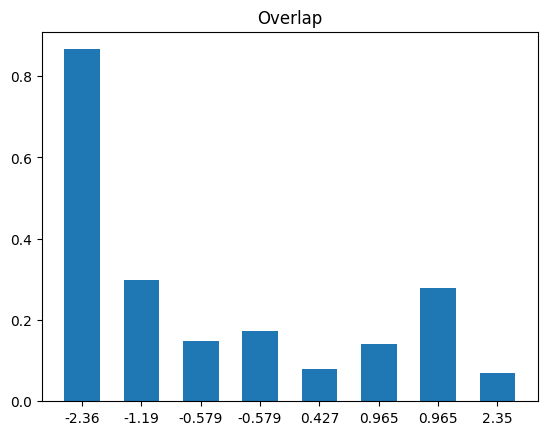

In [13]:
E,vecs = eigh(H)
vecs = [vecs[:,i] for i in range(len(vecs))]
sv = make_overlap(vecs[0], parameters['overlap'])
import numpy as np
plt.title("Overlap")
plt.bar(range(len(vecs)),[np.linalg.norm(sv@vecs[i]) for i in range(len(vecs))], width=.6)
plt.xticks(range(len(vecs)), [f'{i:.3}' for i in E])
plt.show()

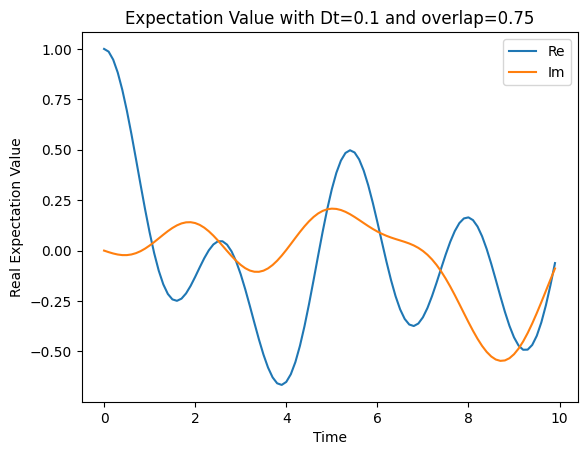

In [14]:

plt.figure()
plt.plot([i*time_step for i in range(len(exp_vals))], [i.real for i in exp_vals], label = "Re")
plt.plot([i*time_step for i in range(len(exp_vals))], [i.imag for i in exp_vals], label = "Im")
plt.legend()
# plt.xlim(0,5000)
plt.xlabel("Time")
plt.ylabel("Real Expectation Value")
plt.title("Expectation Value with Dt="+str(time_step)+" and overlap="+str(parameters['overlap']))
plt.savefig("Graphs/"+make_filename(computation_type, num_timesteps, parameters)+"_shots="+str(parameters['shots'])+"_Dt="+str(time_step)+"_Expectation_Value.png")
plt.show()

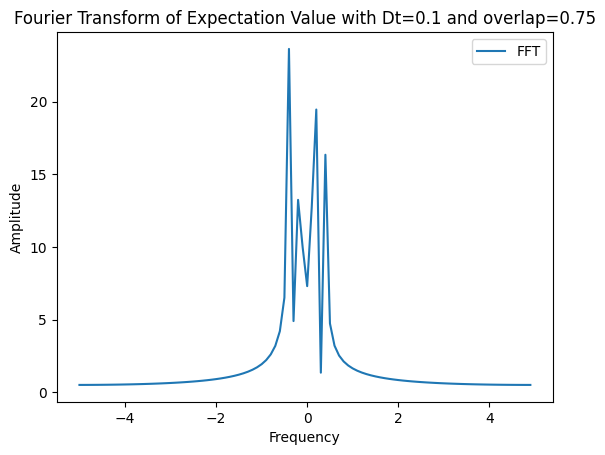

In [15]:

plt.figure()
plt.plot(fftshift(fftfreq(len(exp_vals), d=time_step)), abs(fftshift(fft(exp_vals))), label = 'FFT')
plt.legend()
plt.xlabel("Frequency")
plt.ylabel("Amplitude")
plt.title("Fourier Transform of Expectation Value with Dt="+str(time_step)+" and overlap="+str(parameters['overlap']))
plt.savefig("Graphs/"+make_filename(computation_type, num_timesteps, parameters)+"_shots="+str(parameters['shots'])+"_Dt="+str(time_step)+"_Fourier_Transform_Expectation_Value.png")
plt.show()

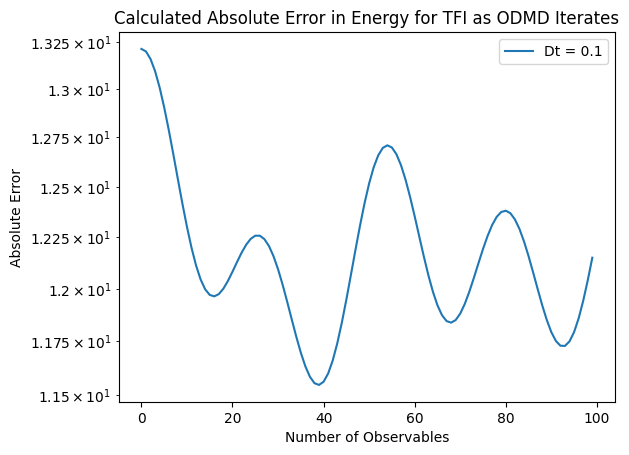

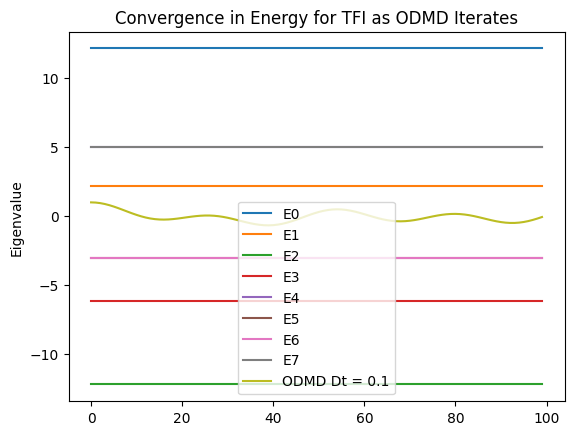

In [16]:
use_shots = False
if use_shots: total_shots = [w*parameters['shots'] for w in observables]
err = [abs(w-real_E_0) for w in exp_vals]
label = 'Dt = '+str(parameters['Dt'])
if use_shots: x=total_shots 
else: x=observables
plt.plot(x, err, label = label)
plt.title("Calculated Absolute Error in Energy for "+parameters['system']+" as ODMD Iterates")
plt.ylabel("Absolute Error")

if use_shots: plt.xlabel("Total Shots")
else: plt.xlabel("Number of Observables")
plt.legend()
# plt.xlim([0,10])
# plt.ylim([0,10])
plt.yscale('log')
plt.savefig("Graphs/"+make_filename(computation_type, num_timesteps, parameters)+"_shots="+str(parameters['shots'])+"_Abs_Error.png")
plt.show()


label = 'ODMD Dt = '+str(parameters['Dt'])
eigs = np.linalg.eigvals(H)
eigs = [(eig.real-parameters['shifting'])*parameters['r_scaling'] for eig in eigs]
for i in range(len(eigs)):
    plt.plot([x[0],x[-1],], [eigs[i],eigs[i]], label = "E"+str(i))
plt.plot(x, exp_vals, label = label)
plt.legend()
# plt.ylim(eigs[0]+.1, eigs[0]-.1)
plt.title("Convergence in Energy for "+parameters['system']+" as ODMD Iterates")
plt.ylabel("Eigenvalue")
plt.savefig("Graphs/"+make_filename(computation_type, num_timesteps, parameters)+"_shots="+str(parameters['shots'])+"_Convergence.png")
plt.show()